# Import Export Data Analysis (Visualize)
Here, the data consists of all types of data regarding revenue, quantity in different units and countries with their unique code and description of the groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import warnings
warnings.filterwarnings('ignore')

### Import the Data
Get the data and load from csv to DataFrames using pandas

In [2]:
# Import the Data
data = pd.read_csv("PC_Export_2015_2016.csv")
data

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,99,Other Commodities,Na,599,Unspecified,NaN,159.558366
1,99,Other Commodities,Na,1213,Kenya,NaN,16.088382
2,99,Other Commodities,Na,1395,Tanzania Rep,NaN,13.965870
3,99,Other Commodities,Na,1417,Uganda,NaN,9.371726
4,99,Other Commodities,Na,2035,Benin,NaN,1.564994
...,...,...,...,...,...,...,...
20766,S6,Petroleum Products,Ton,15430,Uzbekistan,0.0,0.002182
20767,S6,Petroleum Products,Ton,16009,Andorra,23.0,0.010544
20768,S6,Petroleum Products,Ton,16151,Gibraltar,2881283.0,1182.222458
20769,S6,Petroleum Products,Ton,16251,Malta,519491.0,223.057899


## Cleaning the Data

In [3]:
data.isna()

,pc_code,pc_description,unit,country_code,country_name,quantity,value
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
20766,False,False,False,False,False,False,False
20767,False,False,False,False,False,False,False
20768,False,False,False,False,False,False,False
20769,False,False,False,False,False,False,False


In [4]:
# Removing all null values

cleaned_data = data.dropna()
cleaned_data

,pc_code,pc_description,unit,country_code,country_name,quantity,value
209,A1,Tea,Kgs,599,Unspecified,1000.0,0.006049
210,A1,Tea,Kgs,1213,Kenya,3186967.0,5.400802
211,A1,Tea,Kgs,1395,Tanzania Rep,2592.0,0.013705
212,A1,Tea,Kgs,1417,Uganda,194.0,0.001540
213,A1,Tea,Kgs,2035,Benin,257304.0,1.291079
...,...,...,...,...,...,...,...
20766,S6,Petroleum Products,Ton,15430,Uzbekistan,0.0,0.002182
20767,S6,Petroleum Products,Ton,16009,Andorra,23.0,0.010544
20768,S6,Petroleum Products,Ton,16151,Gibraltar,2881283.0,1182.222458
20769,S6,Petroleum Products,Ton,16251,Malta,519491.0,223.057899


### Conversion of the Data
Convert the data according to the requirement by converting into same units

In [5]:
%%time
# Change the values from ton to kgs
cleaned_data = cleaned_data.reset_index()

for row in range(len(list(cleaned_data.iterrows()))):
    if cleaned_data.unit.loc[row] == "Kgs":
        cleaned_data.quantity[row] = cleaned_data.quantity[row]/1000
        cleaned_data.unit.loc[row] = "Ton"
        
    if cleaned_data.unit.loc[row] == "Nos":
        cleaned_data.quantity[row] = cleaned_data.quantity[row]*9.806
        cleaned_data.unit.loc[row] = "Ton"
        
    if cleaned_data.unit.loc[row] == "Sqm":
        cleaned_data.quantity[row] = cleaned_data.quantity[row]*0.098
        cleaned_data.unit.loc[row] = "Ton"
        
    if cleaned_data.unit.loc[row] == "Ltr":
        cleaned_data.unit.loc[row] = "Ton"
        
all_data_in_kgs = cleaned_data

# UnComment The code and execute to run and convert all the kgs data to Ton


CPU times: total: 2min
Wall time: 2min


In [6]:
# save Data
all_data_in_kgs.to_csv('data_with_kgs.csv')

In [7]:
# Making a dataframe for Line graph with quantity and the country names
quantity = all_data_in_kgs.groupby(['country_name']).quantity.sum()[0:50]

line_graph_data = pd.DataFrame(data=quantity)
line_graph_data['country_name'] = line_graph_data.index

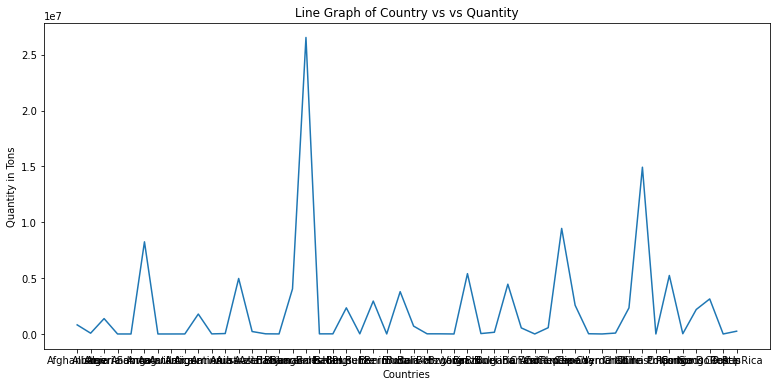

In [8]:
plt.figure(figsize=(13, 6))

x = line_graph_data.index.to_list()
y = line_graph_data.quantity.to_list()

plt.title("Line Graph of Country vs vs Quantity")
plt.xlabel("Countries")
plt.ylabel("Quantity in Tons")
plt.plot(x, y)
plt.show()

## Country having the largest Quantity of Import/Export in India

In [9]:
print("The country having maximum number of sales is ", line_graph_data.max().quantity, " in ", line_graph_data.max().country_name,".")

The country having maximum number of sales is  26547730.114  in  Costa Rica .


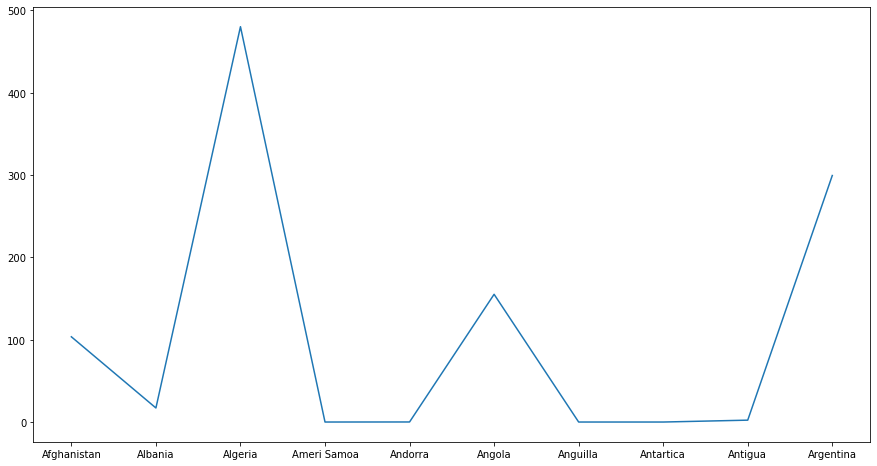

In [10]:
# Visualizing Maximum Revenue in transaction With respect to country

mill_dat = all_data_in_kgs.groupby(['country_name']).value.sum()[0:10]
line_graph_of_revenue = pd.DataFrame(data=mill_dat)
plt.figure(figsize=(15, 8))
x = line_graph_of_revenue.index.to_list()
y = line_graph_of_revenue.value.to_list()

plt.plot(x, y)
plt.show()

# Plot Map Graph

Plot a graph using Maps and then visualize the data

In [11]:
cordinates = pd.read_csv("world_lat_lang.csv")
cordinates = cordinates.drop(columns=["country_code",
                                      "usa_state_latitude", 
                                      "usa_state_code", "usa_state",
                                      "usa_state_longitude"])

dat = all_data_in_kgs.groupby(['country_name']).value.sum()
frame = pd.DataFrame(data=dat)
countries = frame.index.to_list()

## Find the missing Data
Since we have 225 countries with valuable data and only 160 countries with cordinates.
We need to add few cordinates data manually.

In [12]:
# print("The Missing countries in Cordinates data is \n",countries)
countries = [sub.replace("Is.", 'Islands') for sub in countries]
countries = [sub.replace(" Is ", ' Islands ') for sub in countries]
countries = [sub.replace("Is", 'Islands') for sub in countries]
countries = [sub.replace("Islandslands", 'Islands') for sub in countries]
countries = [sub.replace("Islandsland", 'Islands') for sub in countries]
countries = [sub.replace("U", 'United') for sub in countries]
countries = [sub.replace('Rep', 'Republic') for sub in countries]
countries = [sub.replace('Rp', 'Republic') for sub in countries]
countries = [sub.replace('Republicublic', 'Republic') for sub in countries]
countries = [sub.replace('Republicublc', 'Republic') for sub in countries]
countries = [sub.replace('St', 'Saint') for sub in countries]
countries = [sub.replace(' N ', ' And ') for sub in countries]
countries = [sub.replace('N.', 'Northern') for sub in countries]
countries = [sub.replace('Uniteds', 'United') for sub in countries]
countries = [sub.replace('Fr ', 'French ') for sub in countries]


### Add Missing Data

The Missing data Occured due to changes in the naming convension of the country. So renaming them would be the best to recollect all the missing data.

In [13]:
# Alter the Data
countries[countries.index('Bangladesh Pr')] = "Bangladesh"
countries[countries.index('Bosnia-Hrzgovin')] = "Bosnia and Herzegovina"
countries[countries.index('Antartica')] = "Antarctica"
countries[countries.index('Antigua')] = "Antigua and Barbuda"
countries[countries.index('Ameri Samoa')] = "American Samoa"
countries[countries.index('Netherland')]= "Netherlands Antilles"
countries[countries.index('Serbia Montngro')]= "Serbia"
countries[countries.index('Myanmar')]= "Myanmar [Burma]"
countries[countries.index('Faroe Islands')]= "Faroe Islands"
countries[countries.index('Dominic Republic')]= "Dominica"
countries[countries.index('United K')]= "United Kingdom"
countries[countries.index('Lao Pd Republic')]= "Laos"
countries[countries.index('Macedonia')]= "Macedonia [FYROM]"
countries[countries.index('Kiribati Republic')]= "Kiribati"

countries[countries.index('Korea Republic')]= "South Korea"
countries[countries.index('Guinea Bissau')]= "Guinea-Bissau"
countries[countries.index('Egypt A Republic')]= "Egypt"
countries[countries.index('Unitedkraine')]= "Ukraine"
countries[countries.index('Christmas Islands')]= "Christmas Island"
countries[countries.index('Vanuatu Republic')]= "Vanuatu"
countries[countries.index('Sri Lanka Dsr')]= "Sri Lanka"
countries[countries.index('Pakistan Ir')]= "Pakistan"
countries[countries.index('Papua And Gna')]= "Papua New Guinea"
countries[countries.index('Baharain Islands')]= "Bahrain"
countries[countries.index('Br Virgn Islands')]= "British Virgin Islands"


countries[countries.index('Tanzania Republic')]= "Tanzania"
countries[countries.index('Congo D. Republic.')]= "Congo [DRC]"
countries[countries.index('Trinidad')]= "Trinidad and Tobago"
countries[countries.index('Unitedruguay')]= "Uruguay"
countries[countries.index('Panama Republic')]="Panama"
countries[countries.index('C Afri Republic')]= "Central African Republic"
countries[countries.index('China P Republic')]= "China"
countries[countries.index('Vietnam Soc Republic')]= "Vietnam"
countries[countries.index('Slovak Republic')]= "Slovakia"

countries[countries.index('Equtl Guinea')]= "Equatorial Guinea"
countries[countries.index('Macao')]= "Macau"
countries[countries.index('Saudi Arab')]= "Saudi Arabia"
countries[countries.index('Turks C Islands')]= "Turks and Caicos Islands"
countries[countries.index('United S A')]= "United States"
countries[countries.index('Saint Kitt And A')]= "Saint Kitts and Nevis"

countries[countries.index('Kyrghyzstan')]= "Kyrgyzstan"
countries[countries.index('Nauru Republic')]= "Nauru"
countries[countries.index('United Arab Emts')]= "United Arab Emirates"
countries[countries.index('Saint Vincent')]= "Saint Vincent and the Grenadines"
countries[countries.index('Unitedzbekistan')]= "Uzbekistan"
countries[countries.index('Norfolk Islands')]= "Norfolk Island"

countries[countries.index('Islandsrael')]= "Israel"
countries[countries.index('Unitedganda')]= "Uganda"
countries[countries.index('Yemen Republic')]= "Yemen"
countries[countries.index('Cape Verde Islands')]= "Cape Verde"
countries[countries.index('Fiji Islands')]= "Fiji"

# countries[countries.index('Baharain Islands')]= "Bahrain"


In [17]:
# Missing data
listA = frame.index.to_list()
difference = set(countries)-set(listA)
list_diff = list(difference)
list_diff

['China',
 'Antarctica',
 'British Virgin Islands',
 'Northern Mariana Islands',
 'United Minor Outlying Islands',
 'Nauru',
 'Norfolk Island',
 'Macau',
 'Macedonia [FYROM]',
 'Korea Dp Republic',
 'Bahrain',
 'Equatorial Guinea',
 'Saint Helena',
 'Cayman Islands',
 'Congo P Republic',
 'Kiribati',
 'Marshall Islands',
 'United States',
 'Yemen',
 'Turks and Caicos Islands',
 'Vietnam',
 'Sri Lanka',
 'Christmas Island',
 'Myanmar [Burma]',
 'South Korea',
 'Fiji',
 'French Polynesia',
 'French Guiana',
 'Laos',
 'Saudi Arabia',
 'Congo [DRC]',
 'Papua New Guinea',
 'Vanuatu',
 'Egypt',
 'Kyrgyzstan',
 'Cape Verde',
 'Unitednspecified',
 'Central African Republic',
 'Panama',
 'Netherlands Antilles',
 'Virgin Islands United',
 'Bangladesh',
 'United Kingdom',
 'United Arab Emirates',
 'Saint Kitts and Nevis',
 'Cook Islands',
 'Solomon Islands',
 'Guinea-Bissau',
 'American Samoa',
 'Tanzania',
 'Pakistan',
 'Trinidad and Tobago',
 'Faroe Islands',
 'Bosnia and Herzegovina',
 'Saint 

In [18]:
frame

,value
country_name,
Afghanistan,103.535253
Albania,17.075428
Algeria,480.199568
Ameri Samoa,0.013998
Andorra,0.074190
...,...
Vietnam Soc Rep,4545.186108
Virgin Is Us,0.012120
Yemen Republc,286.949739


In [19]:
df = pd.DataFrame()

for i in range(0, len(countries)):
    df = df.append(cordinates[cordinates['country'] == countries[i]])

In [20]:
df = df.reset_index()
# df = df.drop(columns=['level_0', 'index'], axis=1, inplace=True)
frame['country'] = countries

new_df_for_map = df.merge(frame, on='country')
# new_df_for_map ---- This is a new dataframe to publish on maps

print("There are in total ",len(new_df_for_map), "countries available with cordinates")
print(len(countries)," are the total number of countries available in orignal data.")

There are in total  219 countries available with cordinates
225  are the total number of countries available in orignal data.


### Accquired Data
Now all the missing data is Recovered and the final Data for the map plotting is given as below

In [21]:
# Missing data
listA = new_df_for_map.country.to_list()
difference = set(countries)-set(listA)
list_diff = list(difference)
# print("The Missing countries in Cordinates data is \n",list_diff)
len(list_diff)

10

In [22]:
new_df_for_map

,index,latitude,longitude,country,value
0,2,33.939110,67.709953,Afghanistan,103.535253
1,5,41.153332,20.168331,Albania,17.075428
2,58,28.033886,1.659626,Algeria,480.199568
3,11,-14.270972,-170.132217,American Samoa,0.013998
4,0,42.546245,1.601554,Andorra,0.074190
...,...,...,...,...,...
214,232,6.423750,-66.589730,Venezuela,86.840787
215,235,14.058324,108.277199,Vietnam,4545.186108
216,240,15.552727,48.516388,Yemen,286.949739
217,243,-13.133897,27.849332,Zambia,147.243340


In [23]:
print("Now we have cordinates of all the ",len(new_df_for_map)," countries")

Now we have cordinates of all the  219  countries


# Map Implementation

Show revenue generated Data on Maps

In [24]:
# Map
m = folium.Map(location=[20, 0], titles="OpenStreetMap", zoom_start=2)

# Add Circles
for i in range(0, len(new_df_for_map)):
    folium.Circle(
    location=[new_df_for_map.iloc[i]['latitude'], new_df_for_map.iloc[i]['longitude']],
      popup=new_df_for_map.iloc[i]['country'],
      radius=float(new_df_for_map.iloc[i]['value'])*100,
      color='#07575B',
      fill=True,
    ).add_to(m)
    
    

# It has the values of revenue generated in million dollars

# Save the map
m.save('folium_map.html')
# Show the Map
m

# Snail Chart
Implementation of circular chart

plt.figure(figsize=(13,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upper = 50
lower = 40
max = line_graph_of_revenue['value'].max()

slope = (max - lower)/ max

heights = slope * line_graph_of_revenue.value + lower

width = 2*np.pi/15

indexes = list(range(1, len(line_graph_of_revenue.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lower,
    linewidth=2, 
    edgecolor="white")
plt.show()
